In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/100-most-watched-anime-in-the-world/most_watched_anime_dataset_100_entries.csv


In [2]:
df = pd.read_csv("/kaggle/input/100-most-watched-anime-in-the-world/most_watched_anime_dataset_100_entries.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Anime Name,Most Watched in Country,Ratings,Number of Episodes,Animation Studio Name,Budget (in Million USD),Release Year,Genre,Duration per Episode (minutes)
0,Fullmetal Alchemist,Brazil,8.8,317.0,Ufotable,80.61,1998.0,Fantasy,NaN
1,Haikyuu!!,Mexico,9.2,420.0,MAPPA,74.99,2022.0,Adventure,59.0
2,NaN,South Korea,7.4,419.0,A-1 Pictures,59.05,2009.0,Mystery,56.0
3,Bleach,Brazil,6.4,NaN,Ufotable,45.35,2002.0,Fantasy,55.0
4,Sword Art Online,NaN,9.8,327.0,Madhouse,15.90,2017.0,NaN,43.0


In [3]:
df.isnull().sum()

Anime Name                        10
Most Watched in Country           10
Ratings                           10
Number of Episodes                10
Animation Studio Name             10
Budget (in Million USD)           10
Release Year                      10
Genre                             10
Duration per Episode (minutes)    10
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Anime Name                      90 non-null     object 
 1   Most Watched in Country         90 non-null     object 
 2   Ratings                         90 non-null     float64
 3   Number of Episodes              90 non-null     float64
 4   Animation Studio Name           90 non-null     object 
 5   Budget (in Million USD)         90 non-null     float64
 6   Release Year                    90 non-null     float64
 7   Genre                           90 non-null     object 
 8   Duration per Episode (minutes)  90 non-null     float64
dtypes: float64(5), object(4)
memory usage: 7.2+ KB


In [5]:
df['Duration per Episode (minutes)'].fillna(df['Duration per Episode (minutes)'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Anime Name                      90 non-null     object 
 1   Most Watched in Country         90 non-null     object 
 2   Ratings                         90 non-null     float64
 3   Number of Episodes              90 non-null     float64
 4   Animation Studio Name           90 non-null     object 
 5   Budget (in Million USD)         90 non-null     float64
 6   Release Year                    90 non-null     float64
 7   Genre                           90 non-null     object 
 8   Duration per Episode (minutes)  100 non-null    float64
dtypes: float64(5), object(4)
memory usage: 7.2+ KB


<ipython-input-5-099e3502be98>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration per Episode (minutes)'].fillna(df['Duration per Episode (minutes)'].median(), inplace=True)


In [6]:
df[['Anime Name', 'Most Watched in Country', 'Animation Studio Name']] = \
df[['Anime Name', 'Most Watched in Country', 'Animation Studio Name']].fillna('Unknown')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Anime Name                      100 non-null    object 
 1   Most Watched in Country         100 non-null    object 
 2   Ratings                         90 non-null     float64
 3   Number of Episodes              90 non-null     float64
 4   Animation Studio Name           100 non-null    object 
 5   Budget (in Million USD)         90 non-null     float64
 6   Release Year                    90 non-null     float64
 7   Genre                           90 non-null     object 
 8   Duration per Episode (minutes)  100 non-null    float64
dtypes: float64(5), object(4)
memory usage: 7.2+ KB


In [7]:
df['Genre'].unique()

array(['Fantasy', 'Adventure', 'Mystery', nan, 'Supernatural', 'Comedy',
       'Action', 'Thriller', 'Psychological', 'Drama', 'Sci-Fi'],
      dtype=object)

In [8]:
df['Genre'].fillna("Unknown", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Anime Name                      100 non-null    object 
 1   Most Watched in Country         100 non-null    object 
 2   Ratings                         90 non-null     float64
 3   Number of Episodes              90 non-null     float64
 4   Animation Studio Name           100 non-null    object 
 5   Budget (in Million USD)         90 non-null     float64
 6   Release Year                    90 non-null     float64
 7   Genre                           100 non-null    object 
 8   Duration per Episode (minutes)  100 non-null    float64
dtypes: float64(5), object(4)
memory usage: 7.2+ KB


<ipython-input-8-8ce3c298b4d8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genre'].fillna("Unknown", inplace=True)


In [9]:
df[['Ratings', 'Number of Episodes', 'Budget (in Million USD)']] = \
df[['Ratings', 'Number of Episodes', 'Budget (in Million USD)']].apply(lambda col: col.fillna(col.median()))

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Anime Name                      100 non-null    object 
 1   Most Watched in Country         100 non-null    object 
 2   Ratings                         100 non-null    float64
 3   Number of Episodes              100 non-null    float64
 4   Animation Studio Name           100 non-null    object 
 5   Budget (in Million USD)         100 non-null    float64
 6   Release Year                    90 non-null     float64
 7   Genre                           100 non-null    object 
 8   Duration per Episode (minutes)  100 non-null    float64
dtypes: float64(5), object(4)
memory usage: 7.2+ KB


In [10]:
df['Release Year'].fillna(df['Release Year'].mode()[0], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Anime Name                      100 non-null    object 
 1   Most Watched in Country         100 non-null    object 
 2   Ratings                         100 non-null    float64
 3   Number of Episodes              100 non-null    float64
 4   Animation Studio Name           100 non-null    object 
 5   Budget (in Million USD)         100 non-null    float64
 6   Release Year                    100 non-null    float64
 7   Genre                           100 non-null    object 
 8   Duration per Episode (minutes)  100 non-null    float64
dtypes: float64(5), object(4)
memory usage: 7.2+ KB


<ipython-input-10-0753b931c35b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Release Year'].fillna(df['Release Year'].mode()[0], inplace=True)


In [11]:
df.isnull().sum()

Anime Name                        0
Most Watched in Country           0
Ratings                           0
Number of Episodes                0
Animation Studio Name             0
Budget (in Million USD)           0
Release Year                      0
Genre                             0
Duration per Episode (minutes)    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.head()

,Anime Name,Most Watched in Country,Ratings,Number of Episodes,Animation Studio Name,Budget (in Million USD),Release Year,Genre,Duration per Episode (minutes)
0,Fullmetal Alchemist,Brazil,8.8,317.0,Ufotable,80.61,1998.0,Fantasy,39.0
1,Haikyuu!!,Mexico,9.2,420.0,MAPPA,74.99,2022.0,Adventure,59.0
2,Unknown,South Korea,7.4,419.0,A-1 Pictures,59.05,2009.0,Mystery,56.0
3,Bleach,Brazil,6.4,275.0,Ufotable,45.35,2002.0,Fantasy,55.0
4,Sword Art Online,Unknown,9.8,327.0,Madhouse,15.90,2017.0,Unknown,43.0


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


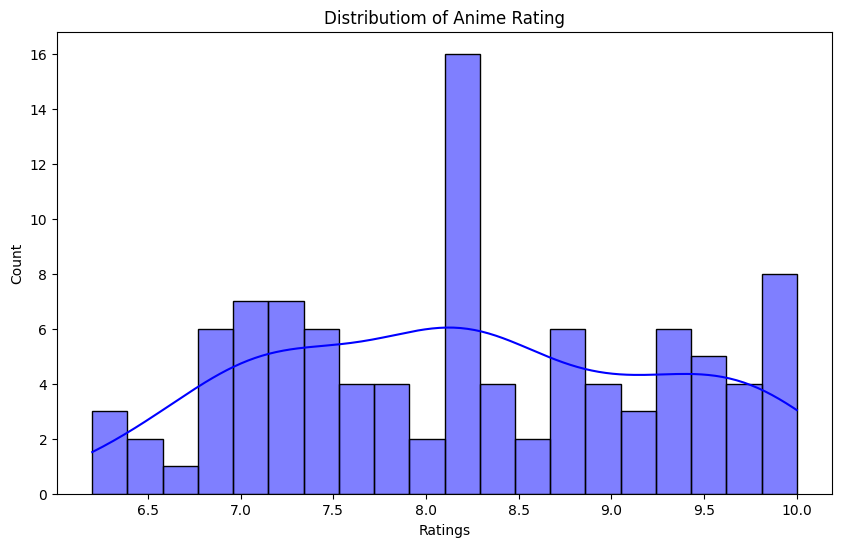

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['Ratings'], bins=20, kde=True, color='blue')
plt.title('Distributiom of Anime Rating')
plt.xlabel('Ratings')
plt.ylabel("Count")
plt.show()

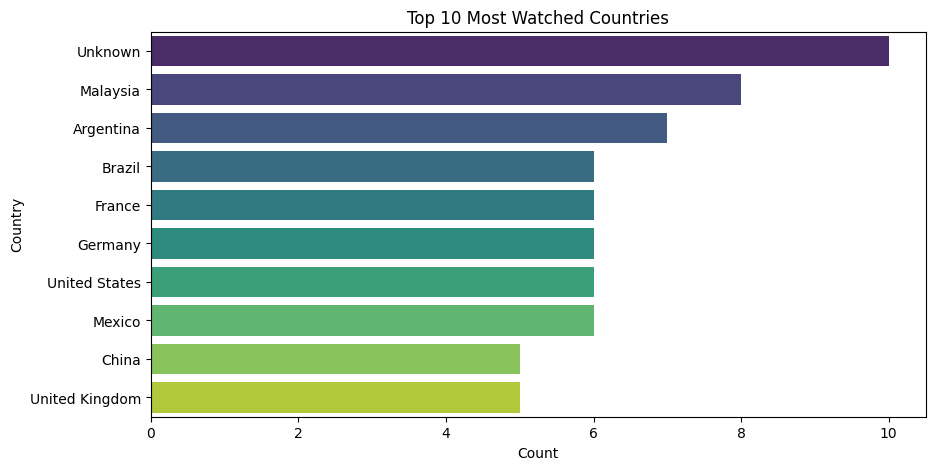

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Most Watched in Country'], order=df['Most Watched in Country'].value_counts().index[:10], palette='viridis')
plt.title("Top 10 Most Watched Countries")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


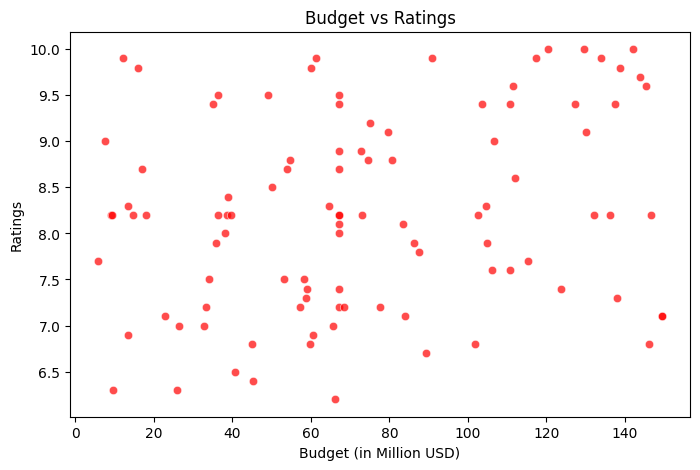

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Budget (in Million USD)'], y=df['Ratings'], alpha=0.7, color='red')
plt.title("Budget vs Ratings")
plt.xlabel("Budget (in Million USD)")
plt.ylabel("Ratings")
plt.show()


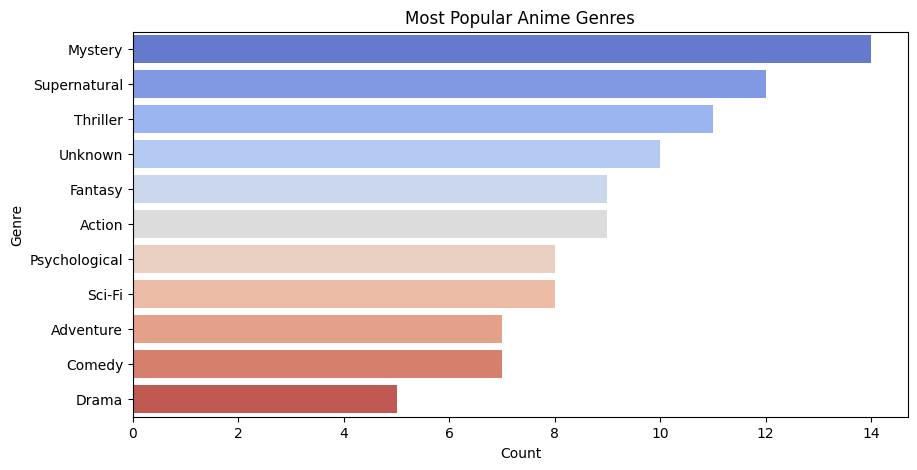

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Genre'], order=df['Genre'].value_counts().index, palette='coolwarm')
plt.title("Most Popular Anime Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


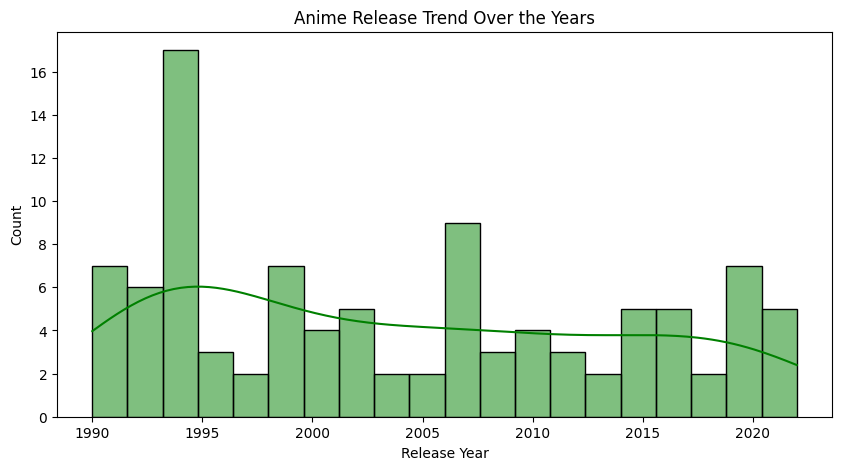

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Release Year'], bins=20, kde=True, color='green')
plt.title("Anime Release Trend Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

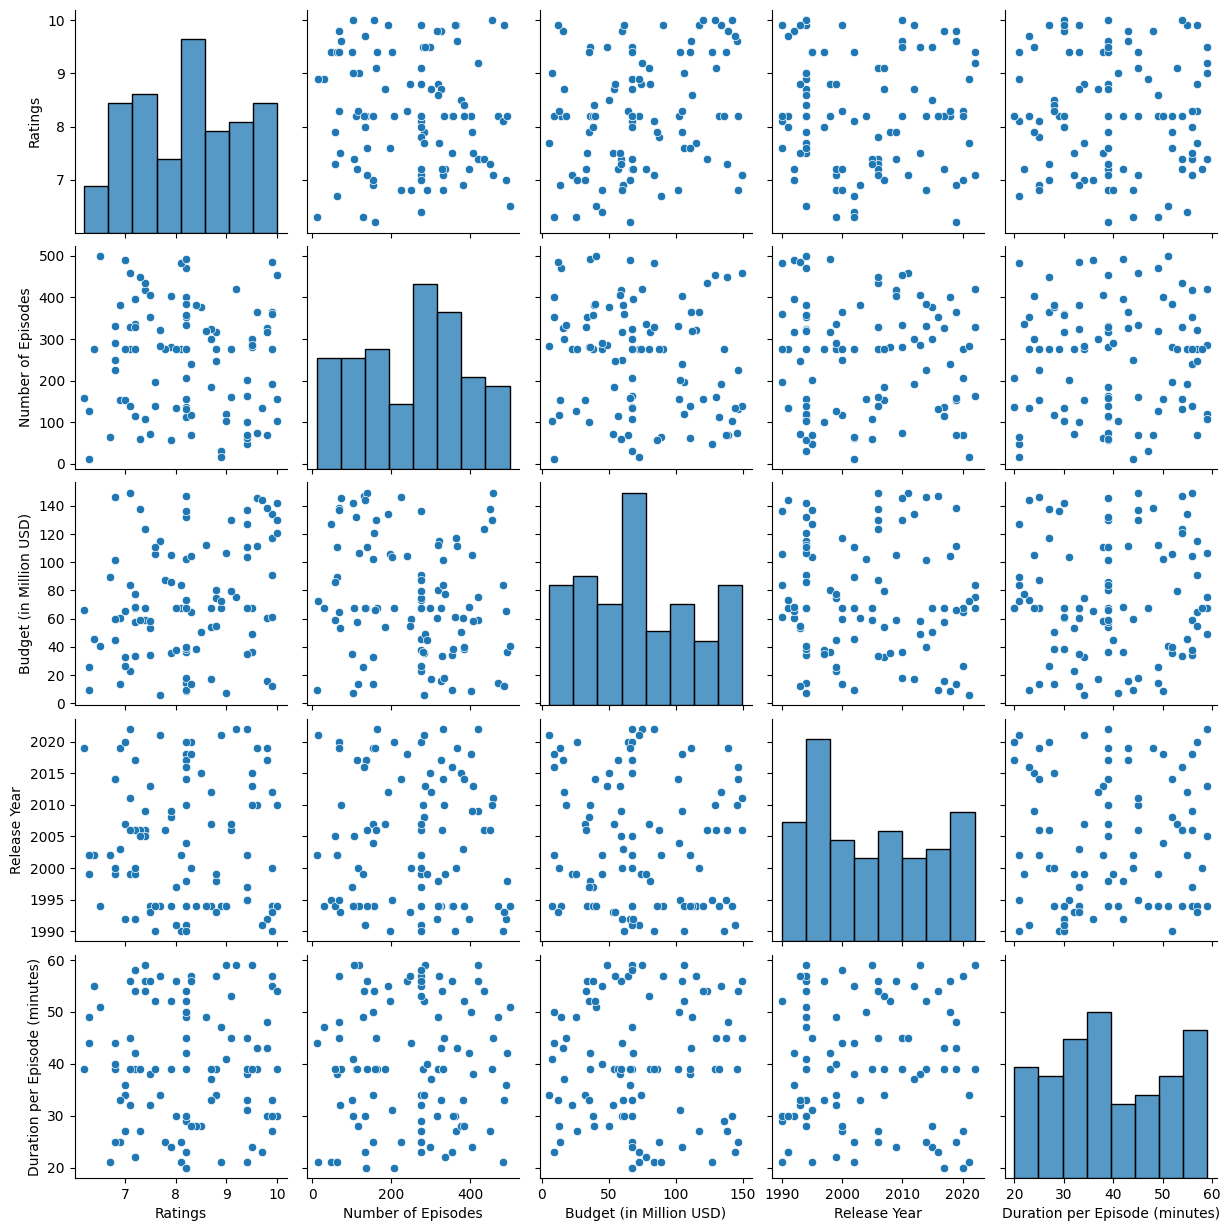

In [20]:
# Pairplot for numerical features
sns.pairplot(df[["Ratings", "Number of Episodes", "Budget (in Million USD)", "Release Year", "Duration per Episode (minutes)"]])
plt.show()

In [21]:
df['Most Watched in Country'] = df['Most Watched in Country'].replace('Unknown', 'Global')


In [22]:
df['Budget per Episode'] = df['Budget (in Million USD)'] / df['Number of Episodes']
df["Modern vs. Classic"] = df["Release Year"].apply(lambda x: "Classic" if x < 2000 else "Modern")
df["Short/Long Anime"] = df["Number of Episodes"].apply(lambda x: "Short" if x <= 12 else ("Medium" if x <= 50 else "Long"))
df.head()

,Anime Name,Most Watched in Country,Ratings,Number of Episodes,Animation Studio Name,Budget (in Million USD),Release Year,Genre,Duration per Episode (minutes),Budget per Episode,Modern vs. Classic,Short/Long Anime
0,Fullmetal Alchemist,Brazil,8.8,317.0,Ufotable,80.61,1998.0,Fantasy,39.0,0.254290,Classic,Long
1,Haikyuu!!,Mexico,9.2,420.0,MAPPA,74.99,2022.0,Adventure,59.0,0.178548,Modern,Long
2,Unknown,South Korea,7.4,419.0,A-1 Pictures,59.05,2009.0,Mystery,56.0,0.140931,Modern,Long
3,Bleach,Brazil,6.4,275.0,Ufotable,45.35,2002.0,Fantasy,55.0,0.164909,Modern,Long
4,Sword Art Online,Global,9.8,327.0,Madhouse,15.90,2017.0,Unknown,43.0,0.048624,Modern,Long


In [23]:
df['Animation Studio Name'].unique()

array(['Ufotable', 'MAPPA', 'A-1 Pictures', 'Madhouse', 'Unknown',
       'Pierrot', 'Bones', 'Trigger', 'Studio Ghibli', 'Toei Animation',
       'Wit Studio'], dtype=object)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Budget (in Million USD)', 'Number of Episodes', 'Duration per Episode (minutes)']] = scaler.fit_transform(
    df[['Budget (in Million USD)', 'Number of Episodes', 'Duration per Episode (minutes)']]
)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [26]:
# Encoding categorical variables
categorical_features = ["Most Watched in Country", "Animation Studio Name", "Genre", "Modern vs. Classic", "Short/Long Anime"]
numerical_features = ["Number of Episodes", "Budget (in Million USD)", "Release Year", "Duration per Episode (minutes)", "Budget per Episode"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Define target variable
X = df.drop(columns=["Anime Name", "Ratings"])  # Drop non-numeric and target column
y = df["Ratings"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=100, learning_rate=0.1, verbose=False, random_state=42),
    "Support Vector Machine": SVR(kernel="rbf"),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "R² Score": r2}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T.sort_values(by="MSE", ascending=True)
print(results_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 7
[LightGBM] [Info] Start training from score 8.235000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
